# Binary search trees

### Group Members and Roles

- Group Member 1 (Role)
- Group Member 2 (Role)
- Group Member 3 (Role)

# Introduction

In this activity, we'll create a Python implementation of *binary search trees* using object-oriented programming and recursion. A binary search tree is a structure that looks like this: 

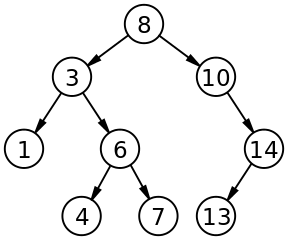

The tree has a *root* (whose value in the example is 8). Each node starting with the root splits into at most two other nodes (called its *children*). The nodes are labeled with numbers or other values.

Like in family trees, children of children, children of children of children, and so on, are called *descendants*. In the picture, 14 and 13 are descendants of 10; and 1, 6, 4, 7 are descendants of 3. Every node except the root is a descendant of the root.

__Binary search trees have to satisfy one rule.__ The value of any given node has to be larger than the left child and its descendants, and smaller than the right child and its descendants. If you check the picture, you will see this rule is observed: e.g. all nodes to the left of the root are smaller than 8, and all nodes to the right are bigger. Furthermore, this is true for every node, not just the root. 

To look for a value inside the tree, you start at the root and go either left or right. At each step, you eliminate roughly half of the possibilities, provided that the tree is balanced (that is, not too lopsided). The point is that this is very fast, and in a specific technical sense it is provably the fastest possible way to locate a value in sorted data. (Take PIC 10B if you want to hear about time complexity of algorithms.) For this reason, many data structures use binary search trees under the hood.

## §1. Start the `Tree` class

We will implement a simple `Tree` class with at least some functionality, all in the code cell below. Start by declaring the class and writing only the keyword `pass` inside to tell the interpreter that the class is empty. (You can't leave empty blocks in Python, so it's good practice to write `pass` to keep the code well-formed. Remove `pass` when you add code to the class.)

In [ ]:
# write your Tree class here


Next, add an `__init__()` method that takes a value and assigns it to the `value` instance variable. Also initialize instance variables `left` and `right` inside this function with the value `None`. Write this code (and future modifications to your class directly in the code cell above -- no need for copy/paste. 

`None` is a Python keyword like `True` and `False` that means exactly what it says -- no value. It evaluates to `False` if you cast it to a boolean (so e.g. if `v` is `None`, and you write `if v:`, the block will not execute).

We wrote the following diagram function to help you see your tree. First add this function to your class:
```python
    def diagram(self, upper=(), lower=(), flip=True):
        def propagate(child, pipes, up, flip):
            if child: child.diagram(pipes + (not up,), pipes + (up,), flip)
        propagate(self.right if flip else self.left, upper, True, flip)
        for pipe in upper[:-1]:
            print(("|" if pipe else " ") + "   ", end="")
        for pipe in upper[-1:]:
            print("+-- ", end="")
        print(self.value)
        propagate(self.left if flip else self.right, lower, False, flip)
```
Don't worry about understanding the function definition for now -- just copy and paste it into your definition (be careful with indentation). 

Your `Tree` class should now have an `__init__()` method and a `diagram()` method. 

## §2. Make a Tree with Recursion


### Strategy

**Recursion** is a fundamental idea in computer programming. Broadly, recursion refers to the idea of repeatedly performing some computation on progressively simpler parts of a problem. While it's possible to use loops to search through binary search trees, recursion is a much simpler method that is easier to read and write. Going back to the example binary search tree from the top of this worksheet, the big insight is that, each time we follow one of the branches, we are *again* at the root of a (new, smaller) binary search tree: 

<figure class="image" style="width:80%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/discussion/search_tree_example.png" alt="">
  <figcaption><i>The purple and yellow boxes both contain binary search trees, rooted at 3 and 6, respectively.</i></figcaption>
</figure>

This structure means that, if we figure out how to search "one level deeper" in a tree, we'll essentially have solved the entire search problem. Furthermore, this also means that we can *construct* trees by nesting them inside each other. That is, each node can contain instance variables `left` and `right`, *which are themselves trees.* 


<figure class="image" style="width:50%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/_images/nested_trees.jpg" alt="">
  <figcaption><i>Our implementation strategy for binary search trees.</i></figcaption>
</figure>

### Example

Let's see this in action. Run the following cell. Note that, as advertised, we are creating trees as instance variables inside other trees. So, for example, `tree.left` and `tree.right` are also trees -- they are the *subtrees* of all descendants of the left and the right  `tree.left.right` refers to a tree at depth level 2, and so on.  

**Note:** The numbers supplied as arguments to each `Tree` object represent the root node of the tree. At the moment, we haven't done anything to enforce the required binary search tree structure, but we'll do that in the next part. 

In [ ]:
tree = Tree(8)
tree.left = Tree(3)
tree.right = Tree(10)
tree.left.left = Tree(1)
tree.left.right = Tree(6)
tree.right.right = Tree(14)
tree.left.right.left = Tree(4)
tree.left.right.right = Tree(7)
tree.right.right.left = Tree(13)
tree.diagram()

You should see a horizontally oriented diagram of the same tree as at the top of the page. If you don't see that, you may have made an error in your class definition -- recheck your code and ask for help if needed. 

## §3. `insert`ing Values

Use the skeleton in the next cell to add an `insert` function to your `Tree` class. The function should take a number and add it to the correct location in the tree. Don't try to move any of the existing nodes around -- it is always possible to add a value without rearranging the tree. 

**Hint**: Let's say we are trying to add a value smaller than the root; then we know we need to send it to the left. If there is no left subtree, we must make one with the provided value, and add it on the left. Otherwise there is a left subtree; but then it has its own `insert` function, which we just call to pass the value along. This is the power of recursion! We've given you the needed code for one of the cases. First, talk with your group about why this works. Then, see if you can figure out the other three. 

```python
def insert(self, value):
    if value < self.value:
        if self.left: # shorthand for "if self has a left instance variable)
            self.left.insert(value)
        else:
            # one line
    elif value > self.value:
        if self.right:
            # one line
        else:
            # one line
```

Make sure that all members of your group understand how your function works. If you need, generate a tree using the next cell, add `print` statements to each case, and call the function once more on the tree with some value, then observe the output to see how the element is passed down the tree.

Your function shouldn't add values that are already on the tree -- our tree nodes will have unique labels.

Once you finish (and add the function to your class), run the next cell to test your function. (Run it many times to see different trees.)

In [ ]:
# generate a random tree

import random

numbers = random.sample(range(0,100), k=20)
tree = Tree(numbers[0])
for v in numbers[1:]:
    tree.insert(v)
tree.diagram()

## §4. Membership Checking

Add a `contains()` method to your `Tree` class. The function should accept an integer argument and return a boolean (`True/False`) indicating whether the value is contained in the tree. You can accomplish this using very similar ideas from your `insert` function. Run the code cell below to test your function.

In [ ]:
numbers = random.sample(range(0,100), k=20)
tree = Tree(numbers[0])
for v in numbers[1:]:
    tree.insert(v)
tree.diagram()

[i for i in range(0,100) if tree.contains(i)]

Generate several random trees as above (run the cell in §3 that generates them) and test the `contains` function with each of them by running the above cell again.

## §5. Removing the smallest value from the tree

Add a `remove_least()` method to your class. The method should take no arguments and remove the smallest value from the tree, unless it is the root. You should not use recursion here -- the function here should use a loop instead of calling itself on a child -- so the idea is a little different.

***Hint***: *in a loop, go all the way left (towards the smaller values), and keep track of the parent nodes along the way. When you get there, you will have to deal with two cases.*

If the smallest value is the root, raise an informative `KeyError`. Test your method (and show your work!). 

## §6. Finding the parent of a node

Add a `get_parent` function to your class. This time, the function should accept an integer and return a tree. The root of the tree should be the parent of the node with the matching number. **Don't make a new tree** -- just return a subtree.

Note that the tree returned by this function will be a piece of the original tree (so if you change one of them, it will also change the other). In particular this means that if you insert into the smaller tree, you can mess up the correct tree ordering of the larger tree.

Raise a `KeyError` if the specified value is not found on the tree. Return `None` if the value belongs to the root. Test your function, showing your work. 

## §7. The `diagram()` method

Wow! If you've made it this far, work with your group and try to figure out how the `diagram()` method supplied at the beginning of the worksheet works. 